# Data Exploration

### Import libraries

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

### Explore data labels
View the first 10 rows of the file.

In [2]:
label_df = pd.read_csv("./labels/part-00000-e9445087-aa0a-433b-a7f6-7f4c19d78ad6-c000.csv")
label_df.head(10)

,bookingID,label
0,111669149733,0
1,335007449205,1
2,171798691856,0
3,1520418422900,0
4,798863917116,0
5,283467841567,0
6,231928234141,0
7,188978561143,0
8,1194000908346,0
9,274877906944,1


**Observations:** Two columns containing bookingID and label.

Check for the following:
* DataType for bookingID
* Number of rows
* Number of unique IDs
* Sum of unique IDs

In [3]:
print("DataType: {}".format(label_df["bookingID"].dtype))
print("Number of rows: {}".format(len(label_df)))
print("Number of unique IDs: {}".format(label_df.bookingID.nunique()))
print("Sum of unique IDs: {}".format(label_df.bookingID.unique().sum()))

DataType: int64
Number of rows: 20018
Number of unique IDs: 20000
Sum of unique IDs: 16324054002362705


**Observations:** Number of rows and unique IDs do not match. 18 IDs have multiple labels.

Verify number of mismatched labels for the 18 duplicate IDs.

In [4]:
dup_list = label_df[label_df.duplicated(subset=["bookingID"], keep='first')]["bookingID"].tolist()
mismatch = 0
for bookingID in dup_list:
    cur_df = label_df.loc[label_df['bookingID'] == bookingID]
    for index in range(1,len(cur_df)):
        if cur_df["label"].iloc[index] != cur_df["label"].iloc[index-1]:
            mismatch += 1
print("Number of duplicated IDs: {}".format(len(dup_list)))
print("Number of mismatch labels: {}".format(mismatch))

Number of duplicated IDs: 18
Number of mismatch labels: 18


**Observations:** All 18 IDs have mismatched labels.

Check if dataset is balanced for the two classes.

In [5]:
label_df["label"].value_counts()

0    15017
1     5001
Name: label, dtype: int64

**Observations:** Unbalanced dataset. Ratio of classes is 3:1 for safe driving vs dangerous driving.

### Explore training data
View the first 10 rows of one of the features file.

In [6]:
features_df = pd.read_csv("./features/part-00000-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv")
features_df.head(10)

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
0,1202590843006,3.000,353.000000,1.228867,8.900100,3.986968,0.008221,0.002269,-0.009966,1362.0,0.000000
1,274877907034,9.293,17.000000,0.032775,8.659933,4.737300,0.024629,0.004028,-0.010858,257.0,0.190000
2,884763263056,3.000,189.000000,1.139675,9.545974,1.951334,-0.006899,-0.015080,0.001122,973.0,0.667059
3,1073741824054,3.900,126.000000,3.871543,10.386364,-0.136474,0.001344,-0.339601,-0.017956,902.0,7.913285
4,1056561954943,3.900,50.000000,-0.112882,10.550960,-1.560110,0.130568,-0.061697,0.161530,820.0,20.419409
5,1185410973787,3.900,178.000000,0.805649,9.206902,2.954445,-0.057104,-0.043555,0.002334,533.0,19.250000
6,163208757379,10.000,262.184418,0.599490,-9.180023,-2.520432,0.026767,-0.030687,-0.006071,556.0,2.110000
7,884763262976,3.000,48.000000,0.109022,10.043245,-0.196497,-0.000698,-0.001902,0.015586,200.0,0.000000
8,841813590178,16.000,44.041702,1.306946,-7.427310,-5.655457,0.013766,-0.017083,0.003231,115.0,13.914648
9,300647710810,6.000,165.000000,0.897853,7.903501,4.932206,0.021364,0.001613,0.009384,824.0,26.602882


**Observations:** 11 columns containing bookingID and features.

Check for the following across all features files:
* DataType for bookingID
* Number of rows
* Number of unique IDs
* Sum of unique IDs

In [7]:
for files in os.listdir("./features/"):
    if ".csv" in files:
        print("Filename: {} ".format(files))
        features_df = pd.read_csv("./features/{}".format(files))
        print("DataType: {}".format(features_df["bookingID"].dtype))
        print("Number of rows: {}".format(len(features_df)))
        print("Number of unique IDs: {}".format(features_df.bookingID.nunique()))
        print("Sum of unique IDs: {}".format(features_df.bookingID.unique().sum()))

Filename: part-00001-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv 
DataType: int64
Number of rows: 1613558
Number of unique IDs: 20000
Sum of unique IDs: 16324054002362705
Filename: part-00000-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv 
DataType: int64
Number of rows: 1613554
Number of unique IDs: 20000
Sum of unique IDs: 16324054002362705
Filename: part-00003-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv 
DataType: int64
Number of rows: 1613553
Number of unique IDs: 20000
Sum of unique IDs: 16324054002362705
Filename: part-00002-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv 
DataType: int64
Number of rows: 1613555
Number of unique IDs: 20000
Sum of unique IDs: 16324054002362705
Filename: part-00005-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv 
DataType: int64
Number of rows: 1613551
Number of unique IDs: 20000
Sum of unique IDs: 16324054002362705
Filename: part-00009-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv 
DataType: int64
Number of rows: 1613562
Number of unique IDs: 20000

**Observations:** Number and sum of unique IDs are the same for all files (including labels file). Number of rows significantly more than number of unique IDs so each ID has quite some rows of features.

Since unique IDs are spread across 10 files, combine and save them into a single csv file before sorting the dataframe by bookingID. View first 10 rows of the sorted df.

In [8]:
combined_df = pd.DataFrame()
for files in os.listdir("./features/"):
    if ".csv" in files:
        features_df = pd.read_csv("./features/{}".format(files))
        combined_df = pd.concat([combined_df, features_df], axis=0)
combined_df = combined_df.sort_values(by=['bookingID'])
combined_df.to_csv("./data/combined.csv", index=False)
combined_df.head(10)

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
1486947,0,8.0,20.008207,-3.210840,-9.072656,0.556424,-0.013643,0.063568,-0.085267,1476.0,17.416878
182521,0,16.0,238.402939,-0.468945,-9.535770,-1.670020,-0.009068,0.009623,-0.011808,289.0,0.162426
698013,0,8.0,145.149109,-1.405640,-9.453973,-1.636673,0.060203,0.060690,-0.052987,129.0,1.255025
1554620,0,8.0,38.211140,-1.489081,-8.955869,-3.116183,-0.022203,0.067966,-0.056358,1100.0,3.646411
771323,0,8.0,145.149109,-1.239954,-9.390121,-1.230234,-0.028091,-0.069767,0.034487,149.0,0.454927
661855,0,8.0,143.298294,-0.493320,-9.516180,-1.825986,0.018617,0.000016,-0.001941,18.0,0.228454
462387,0,8.0,3.279163,-2.355344,-8.801547,-0.946265,0.030622,0.150298,-0.132805,1510.0,21.134399
422349,0,16.0,143.125504,-1.131091,-9.161481,-2.141507,-0.008160,0.020772,-0.011586,166.0,2.697922
120741,0,8.0,293.012756,0.334064,-9.324924,-2.542563,-0.068618,-0.115205,0.019865,1221.0,7.469669
1554021,0,16.0,292.508270,1.636224,-10.831351,-2.437289,-0.028854,0.413561,0.008724,237.0,3.650830


Plot the distribution for number of features of each unique ID.

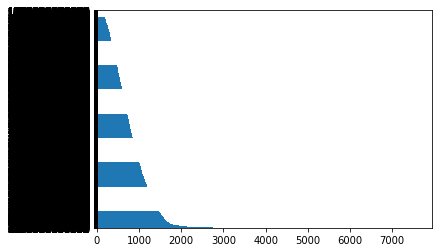

In [9]:
combined_df["bookingID"].value_counts().plot(kind = 'barh')

**Observations:** Number of rows of features appears to be split into 5 distinct groups.

Describe combined dataframe.

In [10]:
combined_df.describe()

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
count,1.613556e+07,1.613556e+07,1.613556e+07,1.613556e+07,1.613556e+07,1.613556e+07,1.613556e+07,1.613556e+07,1.613556e+07,1.613556e+07,1.613556e+07
mean,8.184819e+11,1.161035e+01,1.689684e+02,6.914529e-02,4.468976e+00,8.942974e-01,-1.710847e-03,2.800733e-04,-2.569688e-04,3.803484e+03,9.006543e+00
std,4.952476e+11,8.691672e+01,1.072966e+02,1.424161e+00,8.130664e+00,3.251549e+00,1.445619e-01,3.400630e-01,1.480824e-01,1.436686e+06,8.106415e+00
min,0.000000e+00,7.500000e-01,0.000000e+00,-7.841969e+01,-7.299412e+01,-7.844842e+01,-4.845575e+01,-7.488861e+01,-5.355445e+01,0.000000e+00,-2.000000e+00
25%,3.779571e+11,3.900000e+00,7.800000e+01,-5.081238e-01,-2.022476e+00,-9.316101e-01,-2.678888e-02,-2.993851e-02,-1.876500e-02,2.410000e+02,1.020000e+00
50%,8.074539e+11,4.250000e+00,1.688700e+02,6.137085e-02,9.081485e+00,7.757450e-01,-6.432411e-04,2.645046e-04,-3.542004e-05,5.200000e+02,7.530000e+00
75%,1.254130e+12,8.000000e+00,2.629840e+02,6.350620e-01,9.709778e+00,2.750938e+00,2.330639e-02,3.143085e-02,1.823425e-02,8.630000e+02,1.548000e+01
max,1.709397e+12,6.070101e+03,3.599995e+02,6.687346e+01,7.505589e+01,7.805576e+01,3.983975e+01,8.031496e+01,6.630078e+01,1.495797e+09,1.480186e+02


**Observations:** Columns like Accuracy and Speed have bad data (huge accuracy/negative speed)

Observe the rows for a random ID and sort by second (time elapsed).

In [11]:
combined_df.loc[combined_df['bookingID'] == 438086664371].sort_values(by=['second'])

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
688080,438086664371,4.000,351.0,0.339977,10.928333,1.784877,0.011484,0.070017,-9.646784e-02,0.0,7.340000
1554664,438086664371,4.000,351.0,-0.873884,9.346964,2.134431,0.329745,0.332689,-1.911520e-01,1.0,9.540000
1038426,438086664371,4.000,352.0,0.902614,9.793482,2.266112,-0.014172,0.005877,1.532050e-02,2.0,9.700000
746317,438086664371,4.000,352.0,-0.244209,9.490616,0.541090,-0.038607,0.007098,2.492331e-03,3.0,9.440000
77421,438086664371,4.000,350.0,-0.547075,9.014170,-3.253720,0.074403,-0.085753,1.283306e-01,4.0,9.420000
992307,438086664371,5.000,350.0,-0.480037,8.300697,-1.753753,-0.012339,-0.033219,2.142915e-02,5.0,8.990000
400858,438086664371,5.000,350.0,1.100136,9.385271,-0.304064,0.113499,-0.099803,1.295523e-01,6.0,10.490000
624754,438086664371,5.000,349.0,-0.507571,10.576386,4.575319,-0.126571,0.020537,3.120300e-02,7.0,11.090000
1336458,438086664371,5.000,347.0,0.772130,10.296265,4.357447,-0.022113,0.040696,-5.431814e-02,8.0,10.290000
300509,438086664371,5.000,346.0,1.626860,10.843340,6.062118,-0.482095,-0.354534,2.309559e-01,9.0,9.139999


**Observations:** Data points are quite closely collected most of the time.

Check out accuracy column in combined df.

In [12]:
print("Standard Deviation (Accuracy): {}".format(combined_df['Accuracy'].std()))
print("Max (Accuracy): {}".format(combined_df['Accuracy'].max()))
print("Min (Accuracy): {}".format(combined_df['Accuracy'].min()))
print("Mean (Accuracy): {}".format(combined_df['Accuracy'].mean()))
print("Median (Accuracy): {}".format(combined_df['Accuracy'].median()))

Standard Deviation (Accuracy): 86.91672000640655
Max (Accuracy): 6070.101
Min (Accuracy): 0.75
Mean (Accuracy): 11.61035160989342
Median (Accuracy): 4.25


Check out speed column in combined df.

In [13]:
print("Standard Deviation (Speed): {}".format(combined_df['Speed'].std()))
print("Max (Speed): {}".format(combined_df['Speed'].max()))
print("Min (Speed): {}".format(combined_df['Speed'].min()))
print("Mean (Speed): {}".format(combined_df['Speed'].mean()))
print("Median (Speed): {}".format(combined_df['Speed'].median()))

Standard Deviation (Speed): 8.106414946881673
Max (Speed): 148.01863
Min (Speed): -2.0
Mean (Speed): 9.006543481016644
Median (Speed): 7.5299997


**Observations:** Need to remove high values in Accuracy column and negative values in Speed column.